In [80]:
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.ndimage as ndimage

In [9]:
# load images in
data_path = '/home/michaelneuder/research/imagequalityanalysis/nature_pics/'

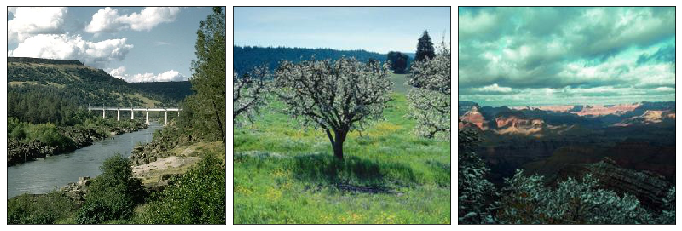

In [10]:
# sample images 
plt.figure(figsize = (12,4))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(3):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

temp_pic1 = mpimg.imread(os.path.join(data_path, 'file-1.jpg'.format(ii)))
temp_pic2 = mpimg.imread(os.path.join(data_path, 'file-5.jpg'.format(ii)))
temp_pic3 = mpimg.imread(os.path.join(data_path, 'file-7.jpg'.format(ii)))

ax_dict[0].imshow(temp_pic1)
ax_dict[1].imshow(temp_pic2)
ax_dict[2].imshow(temp_pic3)

plt.savefig('iclr_sample2.png')
plt.show()

In [11]:
temp_pic1.shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


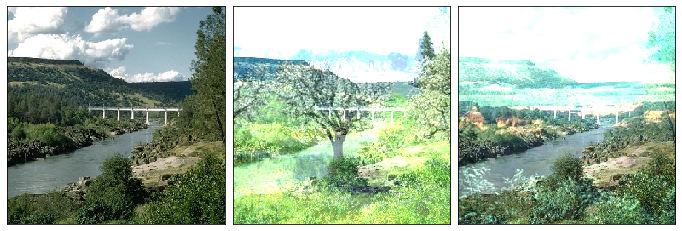

In [12]:
plt.figure(figsize = (12,4))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(3):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

_lambda = 1

ax_dict[0].imshow(temp_pic1)
ax_dict[1].imshow(temp_pic1+np.asarray(_lambda*temp_pic2, dtype=int))
ax_dict[2].imshow(temp_pic1+np.asarray(_lambda*temp_pic3, dtype=int))
plt.savefig('nature_sample2_lambda1.png')
plt.show()

In [13]:
demo = temp_pic1.flatten()

In [14]:
demo.shape

(196608,)

In [15]:
demo.mean()

105.077880859375

In [16]:
demo = demo/demo.mean()

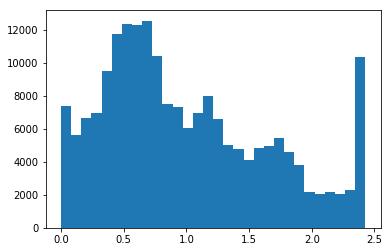

In [17]:
plt.hist(demo, bins= 30)
plt.savefig('img1hist.png')
plt.show()

In [18]:
def normalize(im):
    return np.asarray((im - im.mean()) / im.std())
def uniform(im):
    return np.asarray((im - im.min()) / (im.max()-im.min()))

In [19]:
temp_pic1_norm = np.asarray((temp_pic1 - temp_pic1.mean()) / temp_pic1.std())
temp_pic2_norm = (temp_pic2 - temp_pic2.mean()) / temp_pic2.std()
temp_pic3_norm = (temp_pic3 - temp_pic3.mean()) / temp_pic3.std()

In [20]:
temp_pic1_uni = (temp_pic1 - temp_pic1.min()) / (temp_pic1.max()-temp_pic1.min())
temp_pic2_uni = (temp_pic2 - temp_pic2.min()) / (temp_pic2.max()-temp_pic2.min())
temp_pic3_uni = (temp_pic3 - temp_pic3.min()) / (temp_pic3.max()-temp_pic3.min())

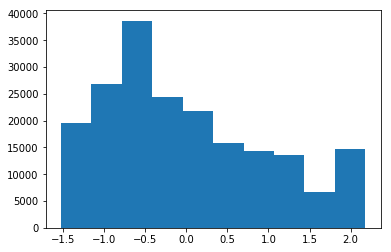

In [21]:
plt.hist(temp_pic1_norm.flatten())
plt.show()

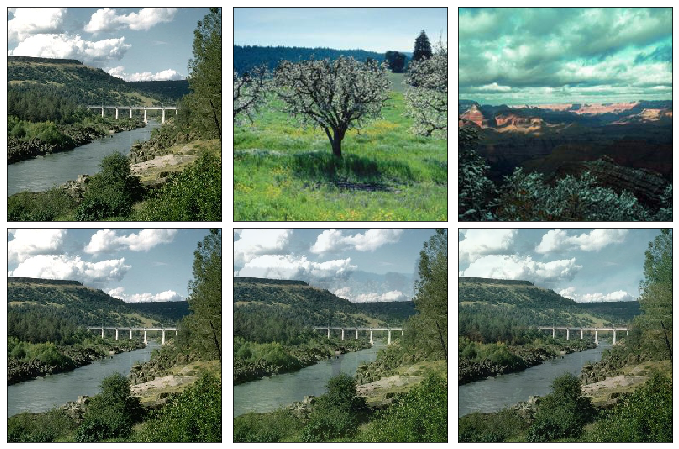

In [22]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)


_lambda = 0.2
ax_dict[0].imshow(temp_pic1)
ax_dict[1].imshow(temp_pic2)
ax_dict[2].imshow(temp_pic3)

ax_dict[3].imshow(temp_pic1)
ax_dict[4].imshow(uniform(temp_pic1+np.asarray(_lambda*temp_pic2, dtype=int)))
ax_dict[5].imshow(uniform(temp_pic1+np.asarray(_lambda*temp_pic3, dtype=int)))

plt.savefig('nature_sample2_sum_uni.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


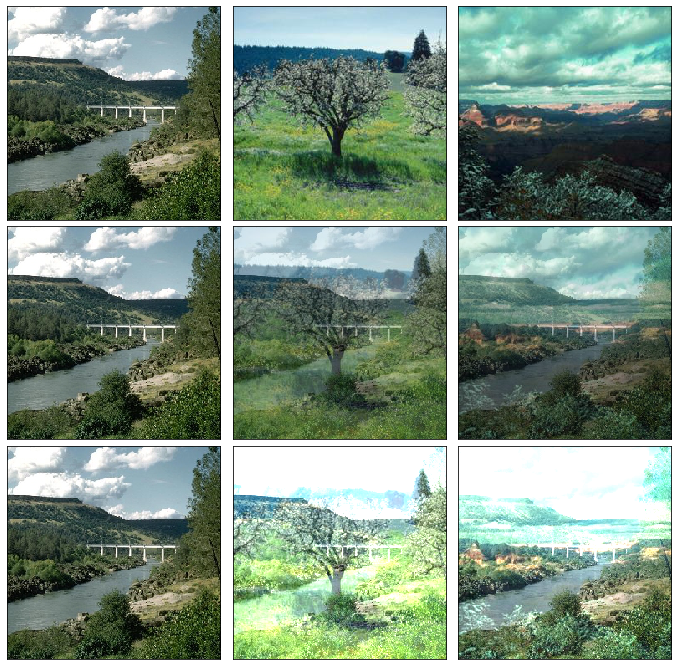

In [23]:
plt.figure(figsize = (12,12))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(9):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)


_lambda = 1
ax_dict[0].imshow(temp_pic1)
ax_dict[1].imshow(temp_pic2)
ax_dict[2].imshow(temp_pic3)

ax_dict[3].imshow(temp_pic1)
ax_dict[4].imshow(uniform(temp_pic1+np.asarray(_lambda*temp_pic2, dtype=int)))
ax_dict[5].imshow(uniform(temp_pic1+np.asarray(_lambda*temp_pic3, dtype=int)))

ax_dict[6].imshow(temp_pic1)
ax_dict[7].imshow(temp_pic1+np.asarray(_lambda*temp_pic2, dtype=int))
ax_dict[8].imshow(temp_pic1+np.asarray(_lambda*temp_pic3, dtype=int))

plt.savefig('nature_sample2_sum_both.png')
plt.show()

In [28]:
# stacking n images on top of eachother.
imgs = []
for ii in range(1,11):
    imgs.append(np.asarray(mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(ii)))))
imgs = np.asarray(imgs)

In [29]:
imgs.shape[1:]

(256, 256, 3)

In [30]:
temp_img = np.zeros((imgs.shape[1:]))
for img in imgs:
    temp_img += np.rot90(img, k=np.random.choice([0,1,2,3]))

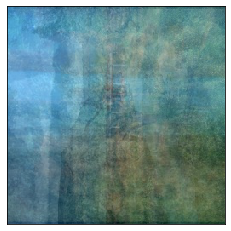

In [31]:
plt.figure(figsize = (4,4))
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(1):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)
ax_dict[0].imshow(uniform(temp_img))
plt.savefig('10stack_randrot.png')
plt.show()

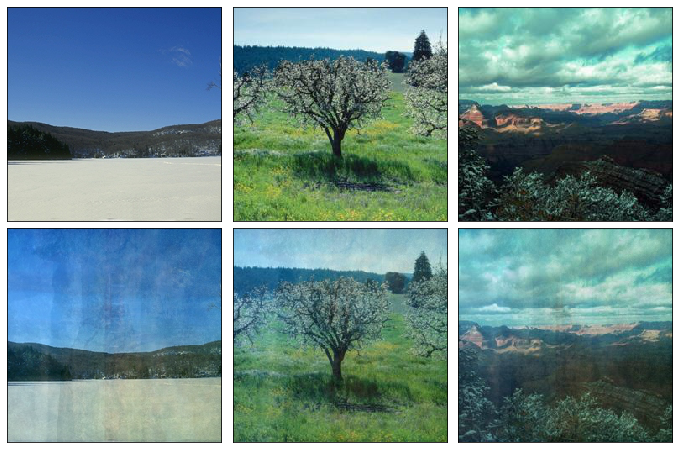

In [32]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

temp_pic1 = mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(100)))
temp_pic1 = mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(101)))
temp_pic1 = mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(102)))
_lambda = 0.1
ax_dict[0].imshow(temp_pic1)
ax_dict[1].imshow(temp_pic2)
ax_dict[2].imshow(temp_pic3)

ax_dict[3].imshow(uniform(temp_pic1+np.asarray(_lambda*temp_img)))
ax_dict[4].imshow(uniform(temp_pic2+np.asarray(_lambda*temp_img)))
ax_dict[5].imshow(uniform(temp_pic3+np.asarray(_lambda*temp_img)))

plt.savefig('nature_sample2_10stack.png')
plt.show()

In [33]:
def createMask(data_path='/home/michaelneuder/research/imagequalityanalysis/nature_pics/'):
    imgs = []
    for ii in range(1,11):
        imgs.append(np.asarray(mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(np.random.randint(410))))))
    imgs = np.asarray(imgs)
    temp_img = np.zeros((imgs.shape[1:]))
    for img in imgs:
        temp_img += np.rot90(img, k=np.random.choice([0,1,2,3]))
    return temp_img

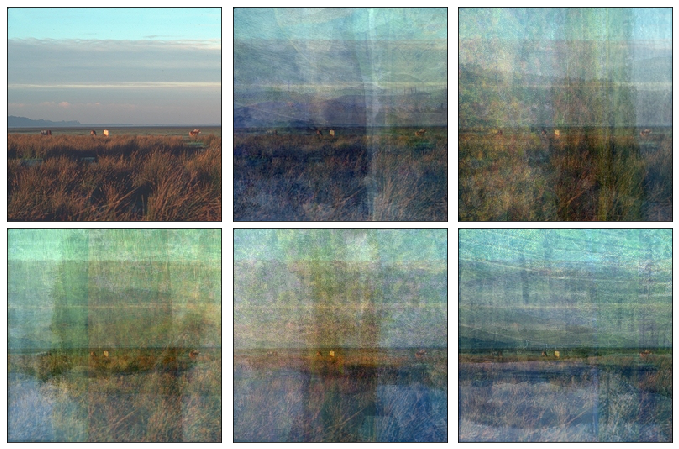

In [36]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

temp_pic1 = mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(100)))
_lambda = 0.2
ax_dict[0].imshow(temp_pic1)
for ii in range(1,6):
    mask = createMask()
    ax_dict[ii].imshow(uniform(temp_pic1+np.asarray(_lambda*mask)))
    
# plt.savefig('nature_sample2_10stack_diffmasks.png')
plt.show()

In [58]:
# z -score images -> addition -> bound
def normalize(im):
    return (im - im.mean()) / im.std()

def uniform(im):
    return np.asarray((im - im.min()) / (im.max()-im.min()))

def createMask(n=10, data_path='/home/michaelneuder/research/imagequalityanalysis/nature_pics/'):
    imgs = []
    for ii in range(n):
        imgs.append(
            normalize(
                np.asarray(
                    mpimg.imread(
                        os.path.join(
                            data_path, 'file-{}.jpg'.format(np.random.randint(1,410)
    ))))))
    imgs = np.asarray(imgs)
    temp_img = np.zeros((imgs.shape[1:]))
    for img in imgs:
        temp_img += np.rot90(img, k=np.random.choice([0,1,2,3]))
    return uniform(temp_img)

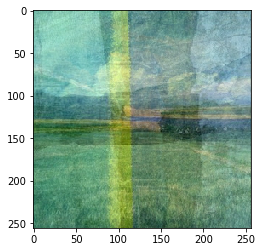

In [104]:
plt.imshow(createMask(n=10))
plt.show()

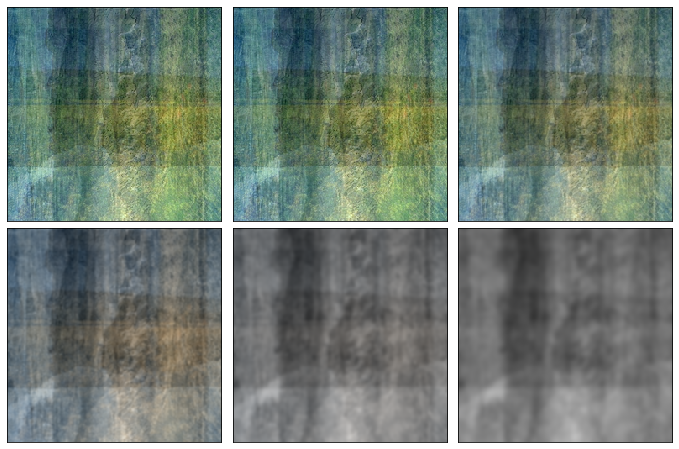

In [105]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

mask = createMask()
ax_dict[0].imshow(mask)
ax_dict[1].imshow(ndimage.gaussian_filter(mask, sigma=0.1))
ax_dict[2].imshow(ndimage.gaussian_filter(mask, sigma=0.5))
ax_dict[3].imshow(ndimage.gaussian_filter(mask, sigma=1))
ax_dict[4].imshow(ndimage.gaussian_filter(mask, sigma=2))
ax_dict[5].imshow(ndimage.gaussian_filter(mask, sigma=3))
    
# plt.savefig('nature_sample2_10stack_diffmasks.png')
plt.show()